In [1]:
%load_ext autoreload
%autoreload 2
from imports import *
from simcodes.helpers import *
%run simcodes/MultiBandSim.py
import os
import folders
import tqdm.notebook
import pandas as pd
import matplotlib.pyplot as plt
subtypes = {'RRAB':'fundamental mode','RRC':'first-overtone','RRD':'double-mode','ARRD':'anomalous double-mode','CEP':'classical','T2CEP':'type-II','ACEP':'anomalous',
           'DSCT_SXPHE':'δ Scuti or SX Phoenicis','MIRA_SR':'Mira or Semiregular'}

In [5]:
folders.scratch_folder

'/mnt/beegfs/scratch-noraid/ktisanic/data/PeriodFinding/'

In [1]:

Gaia = pd.read_csv('data/gaia_periodic_sources.csv',index_col=0)
for col,tocol in zip(['pf','pf.1','p1_o','p2_o','p3_o','p1_o.1','p2_o.1','p3_o.1',],['Period','Period','Period 1','Period 2','Period 3','Period 1','Period 2','Period 3']):
    Gaia.loc[~Gaia[col].isna(),tocol] = Gaia.loc[~Gaia[col].isna(),col]
for col,tocol in zip(['frequency','frequency.1'],['Period','Period']):
    Gaia.loc[~Gaia[col].isna(),tocol] = 1/Gaia.loc[~Gaia[col].isna(),col]


In [2]:
plist = ['Period','Period 1', 'Period 2', 'Period 3']
N = Gaia.shape[0]
for i, p1 in enumerate(plist):
    stat  = (~Gaia[p1].isna() ).sum()
    k =  ['','',  "", p1, stat,100*stat/N]
    if stat>0:
                print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
for i, p1 in enumerate(plist[:1]):
    for j, p2 in enumerate(plist[i+1:]):
        stat = (Gaia[p1].isna() & (~Gaia[p2].isna())).sum()
        k =  ['','',  'no '+p1, p2, stat,100*stat/N]
        if stat>0:
                print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
    j = i+1
    p2 = plist[i+1]
    for j, p2 in enumerate(plist[i+1:-1]):
        for k, p3 in enumerate(plist[i+j+2:]):
            stat =  (Gaia[p1].isna() & Gaia[p2].isna() & (~Gaia[p3].isna())).sum()
            k =  ['','no '+p1, 'no '+p2, p3,stat,100*stat/N]
            if stat>-1:
                print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
    for j, p2 in enumerate(plist[i+1:-1]):
        for k, p3 in enumerate(plist[i+j+2:]):
            stat =  (Gaia[p1].isna() & Gaia[p3].isna() & (~Gaia[p2].isna())).sum()
            k =  ['','no '+p1, p2, 'no '+p3,stat,100*stat/N]
            if stat>-1:
                print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
    for j, p2 in enumerate(plist[i+1:-1]):
        for k, p3 in enumerate(plist[i+j+2:]):
            stat =  (Gaia[p1].isna() & (~Gaia[p2].isna()) & (~Gaia[p3].isna())).sum()
            k =  ['','no '+p1, p2, p3,stat,100*stat/N]
            if stat>-1:
                print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
stat = (Gaia[plist[0]].isna() & Gaia[plist[1]].isna() & (Gaia[plist[2]].isna())& (~Gaia[plist[3]].isna())).sum()
k = ['no '+p for p in plist[:-1]]+plist[-1:]+[stat,100*stat/N]
print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
stat = (Gaia[plist[0]].isna() & Gaia[plist[1]].isna() & (Gaia[plist[2]].isna())& (Gaia[plist[3]].isna())).sum()
k = ['no '+p for p in plist]+[stat,100*stat/N]
print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
stat = (~(Gaia[plist[0]].isna() & Gaia[plist[1]].isna() & (Gaia[plist[2]].isna())& (Gaia[plist[3]].isna()))).sum()
k = plist+[stat,100*stat/N]
print( " %-12s %-12s %-12s %-12s %8d %7.3f"%tuple(k),'%' )
cut = (~Gaia['Period'].isna()) 
Gaia.loc[cut,'Period any'] = Gaia.loc[cut,'Period']
cut = Gaia['Period'].isna() & (~Gaia['Period 1'].isna()) 
Gaia.loc[cut,'Period any'] = Gaia.loc[cut,'Period 1']
cut = Gaia['Period'].isna() &  Gaia['Period 1'].isna() & (~Gaia['Period 2'].isna()) 
Gaia.loc[cut,'Period any'] = Gaia.loc[cut,'Period 2']
cut = Gaia['Period'].isna() &  Gaia['Period 1'].isna() & Gaia['Period 2'].isna() & (~Gaia['Period 3'].isna()) 
Gaia.loc[cut,'Period any'] = Gaia.loc[cut,'Period 3']
for types in ['CEP','RR','MIRA','DSCT_SXPHE','MIRA_SR']:
    Gaia.loc[Gaia.loc[:,'best_class_name'].str.contains(types),'Type'] = types

for key,val in subtypes.items():
    Gaia.loc[Gaia.loc[:,'best_class_name']==key,'Subtype'] = val
Gaia.to_csv(folders.data_folder+'gaia_periodic_sources.csv')

                                        Period         176096  48.382 %
                                        Period 1        29379   8.072 %
                                        Period 2          138   0.038 %
                                        Period 3            5   0.001 %
                           no Period    Period 1        27580   7.578 %
                           no Period    Period 2           68   0.019 %
                           no Period    Period 3            5   0.001 %
              no Period    no Period 1  Period 2            0   0.000 %
              no Period    no Period 1  Period 3            0   0.000 %
              no Period    no Period 2  Period 3            5   0.001 %
              no Period    Period 1     no Period 2     27512   7.559 %
              no Period    Period 1     no Period 3     27575   7.576 %
              no Period    Period 2     no Period 3        68   0.019 %
              no Period    Period 1     Period 2           68   

In [10]:
k1=Gaia.groupby(Gaia['best_class_name']).count()[['source_id','Period any']]
k1=k1.join(Gaia.set_index('best_class_name')[['Type','Subtype']].drop_duplicates(),on='best_class_name').reset_index().set_index('Type')
k1['Percent'] = round(100*k1['source_id']/Gaia.shape[0],2)
k1['Percent (Period)'] = round(100*k1['Period any']/k1['source_id'],2)
k1[['Subtype','source_id','Percent','Period any','Percent (Period)','best_class_name']].sort_index()

,Subtype,source_id,Percent,Period any,Percent (Period),best_class_name
Type,,,,,,
CEP,anomalous,50,0.09,50,100.0,ACEP
CEP,classical,21,0.04,21,100.0,CEP
CEP,type-II,203,0.37,203,100.0,T2CEP
MIRA_SR,Mira or Semiregular,25577,46.90,25577,100.0,MIRA_SR
RR,anomalous double-mode,6,0.01,6,100.0,ARRD
RR,fundamental mode,21896,40.15,21896,100.0,RRAB
RR,first-overtone,6669,12.23,6669,100.0,RRC
RR,double-mode,113,0.21,113,100.0,RRD


best_class_name
ACEP         1.459709
ARRD         0.422249
CEP          3.971503
MIRA_SR    348.653228
RRAB         0.569415
RRC          0.332568
RRD          0.401925
T2CEP       13.206388
Name: Period any, dtype: float64

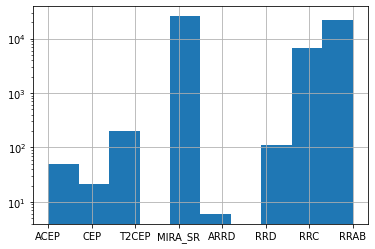

In [15]:
Gaia = pd.read_csv(folders.data_folder+'ZTF_dr3_all_Gaia_3s')\
         .dropna(subset=['Period any'])\
         .sort_values(['Type','Subtype'])\
         .reset_index(drop=True)
Gaia['best_class_name'].hist()
plt.yscale('log')
Gaia.groupby('best_class_name').mean()['Period any']

In [17]:
Gaia.loc[658,'in ZTF 3_arcsec']
import os
import tqdm.notebook
import urllib
import time
Gaia = pd.read_csv(folders.data_folder+'ZTF_dr3_all_Gaia_3s')\
         .dropna(subset=['Period any'])\
         .sort_values(['Type','Subtype'])\
         .reset_index(drop=True)
sizes = {str(i)+'_arcsec':"%.5f"%(i/3600) for i in range(3,4)}

nan

In [ ]:


for size,sizef in sizes.items():
    for idx,row in tqdm.notebook.tqdm(Gaia.loc[658:,:].iterrows(),total=Gaia.loc[658:,:].shape[0]):
        url = r"https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20"\
             +f"{row['ra_1']}"\
             +r"%20"\
             +f"{row['dec_1']}"\
             +r"%20"\
             +sizef\
             +"&BANDNAME=g,r,i&FORMAT=CSV"
        tries = 0
        filename = folders.data_folder+"ZTF/"+size+f"/{row['source_id']}.csv"
        wait = 0
        for tries in range(10):
            try:
                urllib.request.urlretrieve(url, filename)
                L =  pd.read_csv(filename).shape[0]
                break
            except urllib.error.HTTPError:
                wait+=15
                L = 0
                time.sleep(wait)
                
        Gaia.loc[idx, 'in ZTF '+size] = L
        if L==0:
                os.remove(filename)
        with open('log_download.txt','a') as f:
                print(idx,L,row['Type'],row['Subtype'],tries,wait,file=f,sep=',')
        Gaia.to_csv(folders.data_folder+'Gaia_temp.csv')
Gaia.to_csv(folders.data_folder+'Gaia_ZTF_dr3_3arcsec_all.csv')

In [36]:
Gaia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54535 entries, 0 to 54534
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ra_1                  54535 non-null  float64
 1   dec_1                 54535 non-null  float64
 2   col1                  54535 non-null  int64  
 3   source_id             54535 non-null  int64  
 4   best_class_name       54535 non-null  object 
 5   best_class_score      54535 non-null  float64
 6   ra_2                  54535 non-null  float64
 7   dec_2                 54535 non-null  float64
 8   pf                    274 non-null    float64
 9   p1_o                  60 non-null     float64
 10  p2_o                  6 non-null      float64
 11  p3_o                  0 non-null      float64
 12  frequency             25577 non-null  float64
 13  pf.1                  21811 non-null  float64
 14  p1_o.1                7240 non-null   float64
 15  p2_o.1             